# Importing necessary libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

# Loading dataset

In [72]:
filepath = ".\KPMG_VI_New_raw_data_update_final.xlsx"

def load_sheet(sheet_name):
    """
    This function uses pandas,
    to read an excel sheet from a workbook,
    and returns a pandas dataframe
    """
    df = pd.read_excel(filepath, sheet_name=sheet_name, header=1)
    return df

## Transactions Data

In [73]:

tran_df = load_sheet("Transactions")
tran_df.shape

(20000, 13)

In [74]:
tran_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [75]:
tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

The following issues are evident:
* Missing data in columns:
    online_order, brand, product_line, product_class, product_size, standard_cost, and product_first_sold_date,
* product_first_sold_date column has the wrong data type, date_value instead of datetime    

In [76]:
tran_df['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [77]:
tran_df['customer_id'].nunique()

3494

In [78]:
tran_df['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [79]:
tran_df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [80]:
tran_df['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [81]:
tran_df['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

Product specific data should be in its own table

In [82]:
#the online_order column
tran_df['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

### Exploratory Data Analysis

#### Question
How does online_order relate to order_status?

In [83]:
tran_df['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

Both variables in question are categorical.

#### Visualization

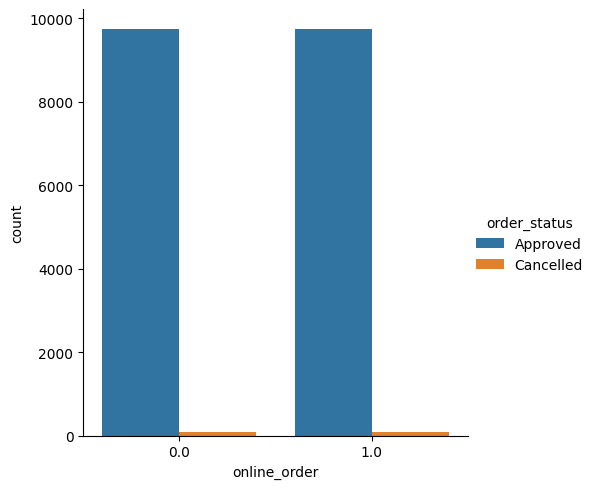

In [84]:
sns.catplot(
    data = tran_df,
    x = 'online_order',
    hue = 'order_status',
    kind = 'count'
);

#### Visualization
An almost equal set of count points for both categories of order_status in online_order column

#### Question
What is the relationship between online_order and product_line?

#### Visualization

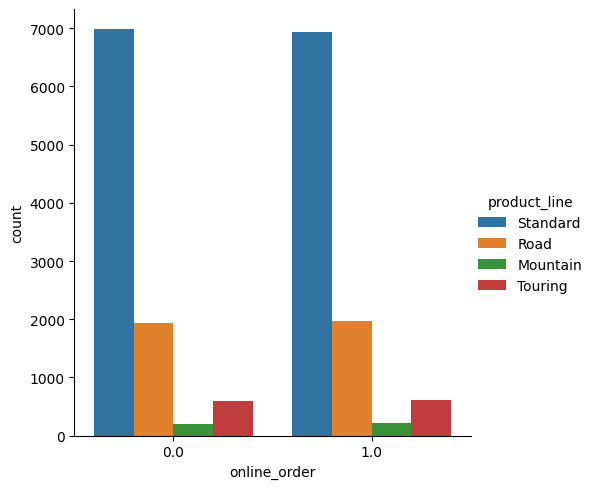

In [85]:
sns.catplot(
    data = tran_df,
    x = "online_order",
    hue = "product_line",
    kind = 'count'
);


#### Observation
There is a uniform distribution of product_line categories across both online_order categories

#### Question
Investigating the relationship between online_order and list_price

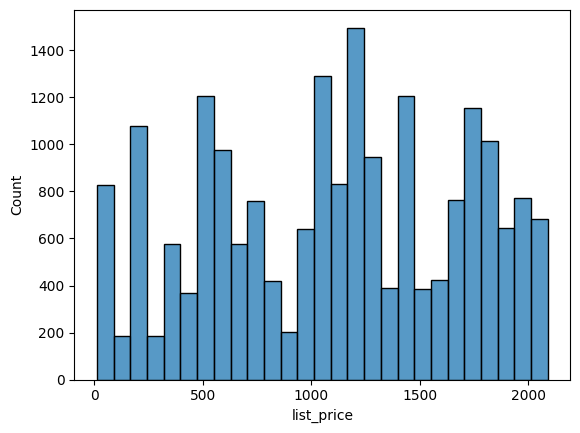

In [86]:
sns.histplot(
    data = tran_df,
    x = "list_price"
);

products list_price has a multi_modal distribution

#### Visualization

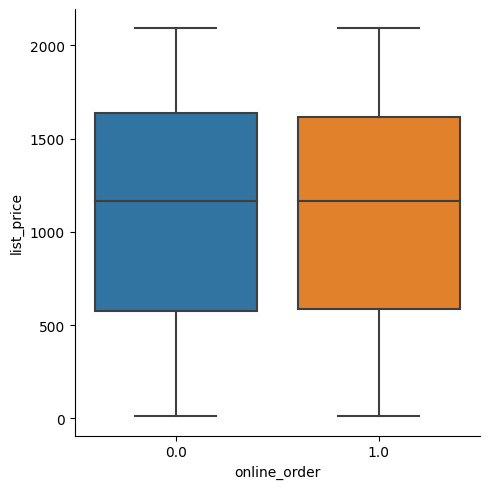

In [87]:
sns.catplot(
    data = tran_df,
    x = "online_order",
    y = "list_price",
    kind = "box"
);

#### Observation
Again, a uniform distribution between the 2 categories

#### Question
What is the relationship between list_price and standard_cost? 

#### Visualization

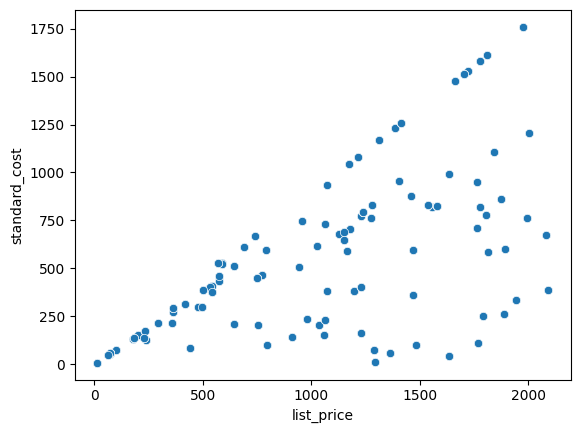

In [88]:
sns.scatterplot(
    data = tran_df,
    x = "list_price",
    y = 'standard_cost'
);

In [89]:
tran_df['standard_cost'].corr(tran_df['list_price'])

0.5515392419631606

#### Observation
There is generally a positive correlation between the features.

## Imputation of Missing Values
Using KNN imputation method to fill missing values

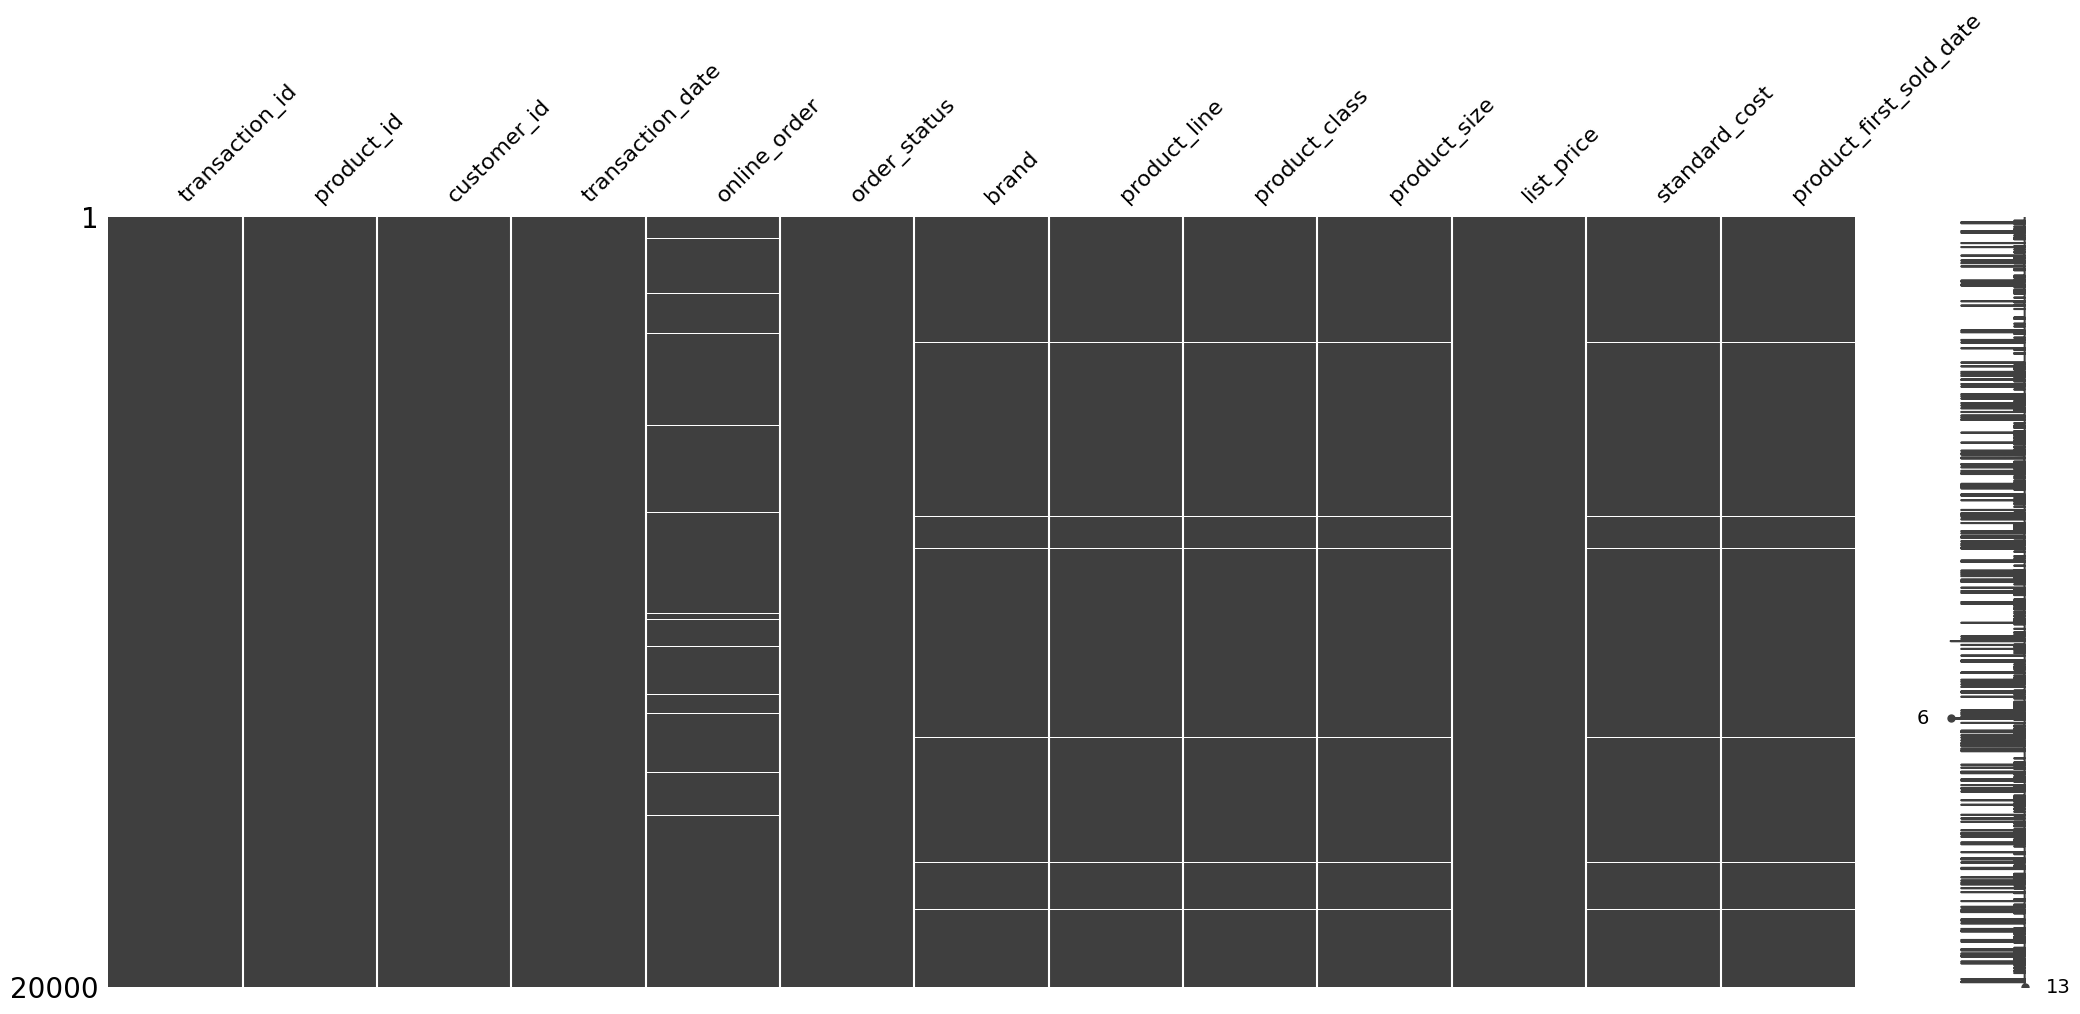

In [90]:
msno.matrix(tran_df);

brand, product_line, product_class, product_size, standard_cost and product_first_sold_date are missing data in similar rows.

In [91]:
#making a copy of the transactions dataframe
tran_copy = tran_df.copy()

In [92]:
# mapping categorical classes into numeric for the KNN algorithm
tran_copy['brand_map'] = tran_copy['brand'].map({'Solex' : 0, 'Giant Bicycles' : 1, 'WeareA2B' : 2, 'OHM Cycles' : 3, 'Trek Bicycles' : 4, 'Norco Bicycles' : 5})
tran_copy['product_line_map'] = tran_copy['product_line'].map({'Standard' : 0, 'Road' : 1, 'Touring' : 2, 'Mountain' : 3})
tran_copy['product_class_map'] = tran_copy['product_class'].map({'medium' : 0, 'high' : 1, 'low' : 2})
tran_copy['product_size_map'] = tran_copy['product_size'].map({'medium' : 0, 'large' : 1, 'small' : 2})

In [93]:
#list of mapped columns to be imputed
prod_list = ['brand_map', 'product_line_map', 'product_class_map', 'product_size_map', 'list_price','standard_cost', 'product_first_sold_date']

In [94]:
tran_copy[prod_list].head()

,brand_map,product_line_map,product_class_map,product_size_map,list_price,standard_cost,product_first_sold_date
0,0.0,0.0,0.0,0.0,71.49,53.62,41245.0
1,4.0,0.0,0.0,1.0,2091.47,388.92,41701.0
2,3.0,0.0,2.0,0.0,1793.43,248.82,36361.0
3,5.0,0.0,0.0,0.0,1198.46,381.10,36145.0
4,1.0,0.0,0.0,1.0,1765.30,709.48,42226.0


In [95]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

tran_imputed_product = imputer.fit_transform(tran_copy[prod_list])

tran_imputed_product

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 7.14900e+01,
        5.36200e+01, 4.12450e+04],
       [4.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.09147e+03,
        3.88920e+02, 4.17010e+04],
       [3.00000e+00, 0.00000e+00, 2.00000e+00, ..., 1.79343e+03,
        2.48820e+02, 3.63610e+04],
       ...,
       [3.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.63690e+03,
        4.47100e+01, 4.04100e+04],
       [3.00000e+00, 0.00000e+00, 1.00000e+00, ..., 2.27880e+02,
        1.36730e+02, 3.82160e+04],
       [4.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.77581e+03,
        1.58047e+03, 3.63340e+04]])

In [96]:
#converting numpy array of imputed results into a dataframe
prod_imputed_df = pd.DataFrame(tran_imputed_product, columns=prod_list)

In [97]:
prod_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand_map                20000 non-null  float64
 1   product_line_map         20000 non-null  float64
 2   product_class_map        20000 non-null  float64
 3   product_size_map         20000 non-null  float64
 4   list_price               20000 non-null  float64
 5   standard_cost            20000 non-null  float64
 6   product_first_sold_date  20000 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


Remapping original categories into the imputed df

In [98]:
prod_imputed_df['brand'] = prod_imputed_df['brand_map'].map({0 : 'Solex', 1 :'Giant Bicycles', 2 : 'WeareA2B', 3 : 'OHM Cycles', 4 : 'Trek Bicycles', 5 : 'Norco Bicycles'})
prod_imputed_df['product_line'] = prod_imputed_df['product_line_map'].map({0 : 'Standard', 1 : 'Road', 2 : 'Touring', 3 : 'Mountain'})
prod_imputed_df['product_class'] = prod_imputed_df['product_class_map'].map({0 : 'medium', 1 : 'high' , 2 : 'low'})
prod_imputed_df['product_size'] = prod_imputed_df['product_size_map'].map({ 0: 'medium', 1 : 'large', 2 : 'small'})

In [99]:
prod_imputed_df = prod_imputed_df.drop(columns=['brand_map', 'product_line_map', 'product_class_map', 'product_size_map'])

In [100]:
prod_imputed_df.head()

,list_price,standard_cost,product_first_sold_date,brand,product_line,product_class,product_size
0,71.49,53.62,41245.0,Solex,Standard,medium,medium
1,2091.47,388.92,41701.0,Trek Bicycles,Standard,medium,large
2,1793.43,248.82,36361.0,OHM Cycles,Standard,low,medium
3,1198.46,381.10,36145.0,Norco Bicycles,Standard,medium,medium
4,1765.30,709.48,42226.0,Giant Bicycles,Standard,medium,large


In [101]:
#adding back complete product columns into the transactions df
tran_copy[['standard_cost', 'brand', 'product_line', 'product_class', 'product_size', 'product_first_sold_date']] = prod_imputed_df[['standard_cost', 'brand', 'product_line', 'product_class', 'product_size', 'product_first_sold_date']]

In [102]:
#dropping off mapping columns
tran_copy = tran_copy.drop(columns=['brand_map', 'product_line_map', 'product_class_map', 'product_size_map'])

Imputing online_order column

In [103]:
order_df = tran_df.copy()

In [104]:
#creating a map for order_status
order_df['order_status_map'] = order_df['order_status'].map({"Approved" : 1, "Cancelled" : 0})

In [105]:
#using order_status and list_price to impute online_order
ord_list = ['order_status_map', 'online_order', 'list_price']
order_imputed_arr = imputer.fit_transform(order_df[ord_list])
order_imputed_df = pd.DataFrame(order_imputed_arr, columns=ord_list)

In [106]:
#adding back complete online_order column into the transactions df
tran_copy['online_order'] = order_imputed_df['online_order']
tran_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

Converting product_first_sold_date into datetime format

In [129]:
#converting serial date format to datetime
import xlrd

def convert_date(serial_date):
    """
    This function takes in a date in serial format,
    and converts it into pandas datetime format,
    using xlrd library
    """
    date_time_date = xlrd.xldate_as_datetime(serial_date, 0)
    date_object = date_time_date.date()
    return date_object

In [131]:
#using convert_date function to convert the dates in product_first_sold_date column
tran_copy['product_first_sold_date'] = tran_copy['product_first_sold_date'].apply(convert_date)

In [132]:
tran_copy['product_first_sold_date'].head()

0    2012-12-02
1    2014-03-03
2    1999-07-20
3    1998-12-16
4    2015-08-10
Name: product_first_sold_date, dtype: object

We have dealt with all issues in the transactions sheet, and will save the clean data to a csv file.

In [133]:
#saving df to csv file
#tran_copy.to_csv("transactions_clean.csv", index=False)

## Customer Addresses

In [108]:
add_df = load_sheet("CustomerAddress")
add_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [109]:
add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


No missing data for addresses

In [110]:
add_df.sample(10)

,customer_id,address,postcode,state,country,property_valuation
1083,1088,04328 Rowland Plaza,3441,VIC,Australia,9
2150,2155,5882 American Ash Point,3214,VIC,Australia,3
3435,3440,04036 Kennedy Trail,2221,NSW,Australia,12
3299,3304,0 Sachs Circle,4122,QLD,Australia,8
254,259,8208 Parkside Point,2320,NSW,Australia,6
1231,1236,014 Birchwood Parkway,3030,VIC,Australia,7
3251,3256,7798 Westport Trail,4031,QLD,Australia,9
2277,2282,953 Del Sol Point,3630,VIC,Australia,4
203,208,056 Stone Corner Alley,4078,QLD,Australia,7
1801,1806,507 Onsgard Place,4701,QLD,Australia,1


Some states are written in full while some are abbreviations

In [111]:
add_df['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [112]:
#replacing full state names with abbreviations
add_df['state'].replace({'New South Wales':'NSW', 'Victoria':'VIC'}, inplace=True)

In [113]:
add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [114]:
#saving clean addresses to csv
#add_df.to_csv('addresses_clean.csv', index=False)

## Customer Demographic

In [115]:
demo_df = load_sheet("CustomerDemographic")
demo_df.head()

c:\Users\admin\anaconda3\envs\min_ds\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  if __name__ == "__main__":


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [116]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

missing data in columns: last_name, DOB, job_title, job_industry_category, default, and tenure 

column *default* contains some invalid characters, so will drop it.

In [117]:
demo_df.drop(columns=['default'],inplace=True)

In [118]:
demo_df['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [119]:
demo_df['gender'].replace({'F':'Female', 'Femal':'Female', 'M':'Male'}, inplace=True)

In [120]:
#lets see the entries with gender as U, if we can map out the proper gender
demo_df.query('gender == "U"').sample(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN
3254,3255,Sutherlan,Truin,U,47,NaT,Engineer IV,IT,High Net Worth,N,No,NaN
2413,2414,Basile,Bowlas,U,18,NaT,Registered Nurse,Health,Mass Customer,N,Yes,NaN
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0
1243,1244,Glenn,Tinham,U,80,NaT,Financial Analyst,Financial Services,Mass Customer,N,Yes,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN
798,799,Harland,Spilisy,U,39,NaT,Programmer I,IT,Mass Customer,N,Yes,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
1779,1780,Maude,Tixier,U,52,NaT,Research Associate,IT,Mass Customer,N,No,NaN
3717,3718,Damiano,NaN,U,22,NaT,Geologist IV,IT,Mass Customer,N,Yes,NaN


Will leave those with gender as U as is.

In [121]:
demo_df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [122]:
##using DOB to calculate customer age
demo_df['DOB'].dtype

dtype('<M8[ns]')

In [123]:
from datetime import datetime, date
today = date.today()

def age_converter(birth_date):
    born = birth_date.date()
    age = today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    return age

In [124]:
demo_df['Age'] = demo_df['DOB'].apply(age_converter)

In [125]:
demo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,41.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,68.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,61.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,45.0


In [126]:
demo_df.drop(columns=['DOB'], inplace=True)

In [134]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   job_title                            3494 non-null   object 
 6   job_industry_category                3344 non-null   object 
 7   wealth_segment                       4000 non-null   object 
 8   deceased_indicator                   4000 non-null   object 
 9   owns_car                             4000 non-null   object 
 10  tenure                               3913 non-null   float64
 11  Age                           

Lets explore some relationships

### Exploratory Data Analysis


#### Question
Relationship between tenure and age.

#### Visualization

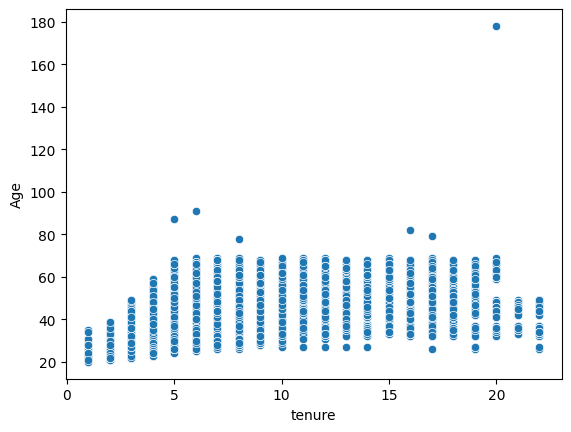

In [135]:
sns.scatterplot(
    data = demo_df,
    x = 'tenure',
    y = 'Age'
);

#### Observation
No concrete relationship between the 2. But there seems to be an outlier in the Age column.

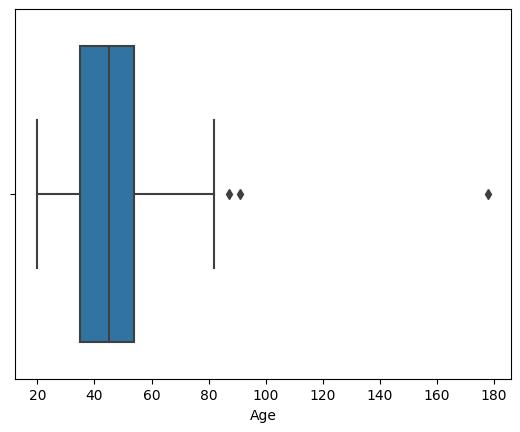

In [136]:
sns.boxplot(
    data = demo_df,
    x = 'Age'
);

There is a customer whose age has been recorded as about 180 years old. Let's see if the person is recorded as still alive or deceased?

In [137]:
demo_df['Age'].max()

178.0

In [138]:
demo_df.query('Age == 178')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,Legal Assistant,IT,Affluent Customer,N,No,20.0,178.0


This person is marked as still alive, and has been very active in the past 3 years with bike_related_purchases. 

#### Question
Let us see the Age distribution within the wealth segments.

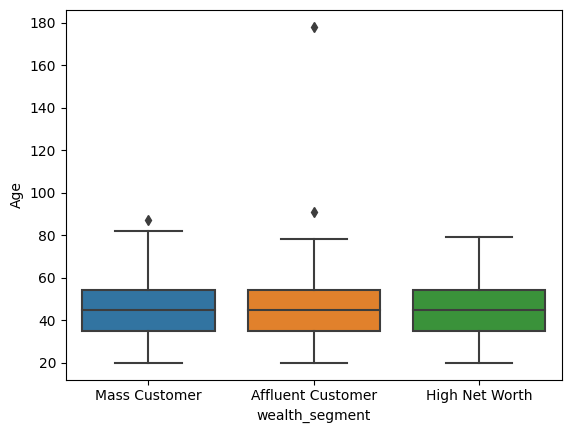

In [141]:
sns.boxplot(
    data = demo_df,
    x = 'wealth_segment',
    y = 'Age'
);

The Age distributions are strikingly similar across all wealth segments. Odd

#### Question
Lets investigate the tenure distribution.

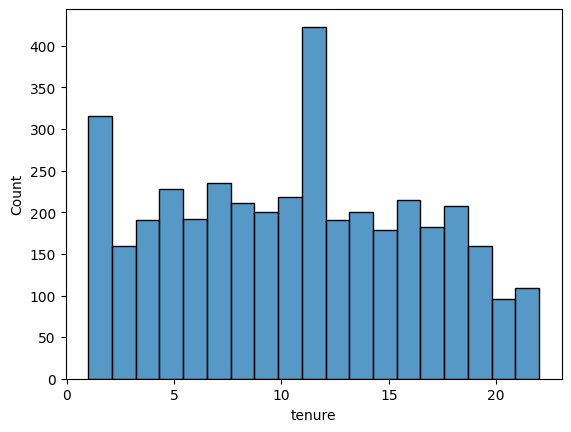

In [142]:
sns.histplot(
    data = demo_df,
    x = "tenure"
);

A bimodal distribution, with most customers having a tenure of 11.

In [127]:
#saving dataframe to csv
#demo_df.to_csv("demographics_clean.csv", index=False)